In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Read and Cleaning the data & EDA

In [2]:
wine = pd.read_excel ('Part2 - Company.xlsx')
wine.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [3]:
wine.shape

(61, 5)

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [5]:
wine.dtypes

A           int64
B           int64
C           int64
D           int64
Quality    object
dtype: object

In [6]:
wine.isna().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [7]:
wine['Quality'].value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

In [8]:
new_wine=wine

In [9]:
new_wine=new_wine.drop(columns='Quality')

## Target Imbalance and Multivariate Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<AxesSubplot:ylabel='Quality'>

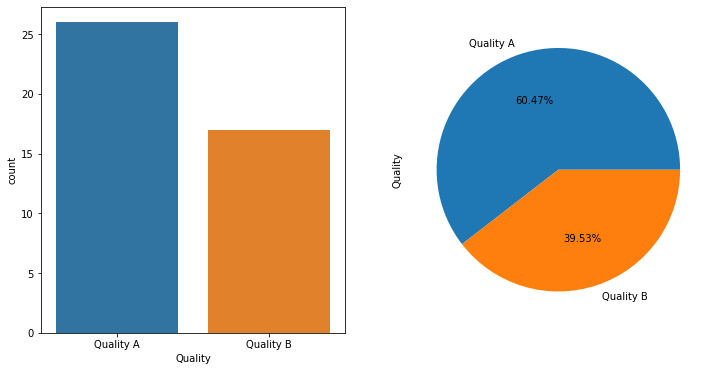

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(wine['Quality'])
plt.subplot(1,2,2)
wine['Quality'].value_counts().plot.pie( autopct='%1.2f%%')

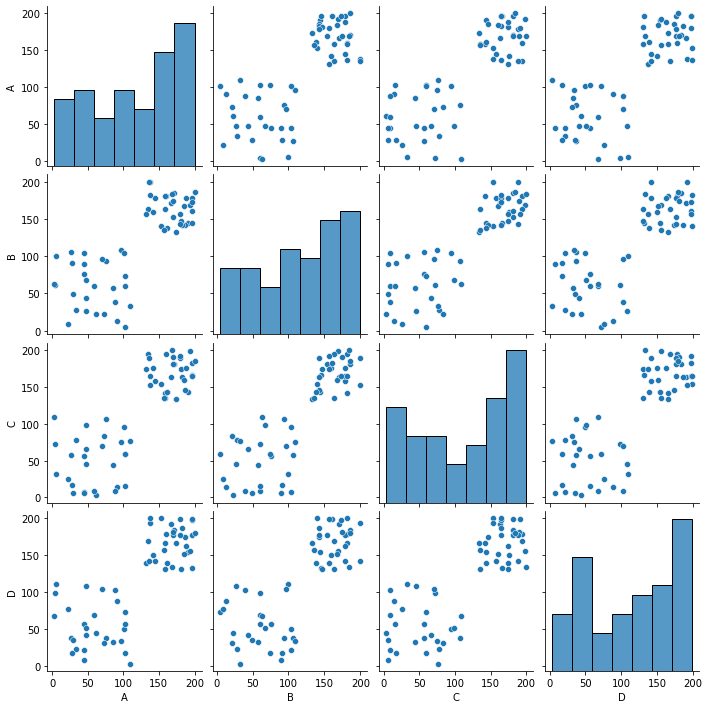

In [12]:
sns.pairplot(new_wine)

<AxesSubplot:>

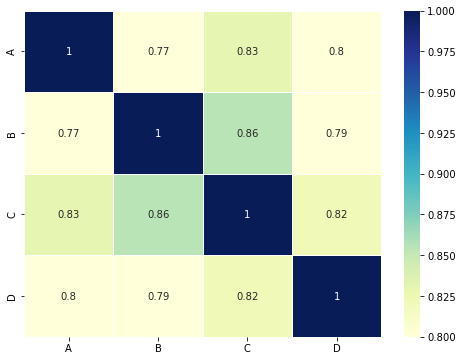

In [13]:
plt.figure(figsize=(8,6))
corr=new_wine.corr()
sns.heatmap(corr,annot=True,vmin=0.8,linewidths=.5, cbar=True, cmap="YlGnBu")

In [14]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

new_wine=new_wine.apply(zscore)

##  KMeans Clustering & Elbow Method

In [15]:
wss =[] 
for i in range(1,5):
    KM = KMeans(n_clusters=i)
    KM.fit(new_wine)
    wss.append(KM.inertia_)
wss

[244.00000000000006, 45.52255176619497, 37.939553142628036, 32.78948920511346]

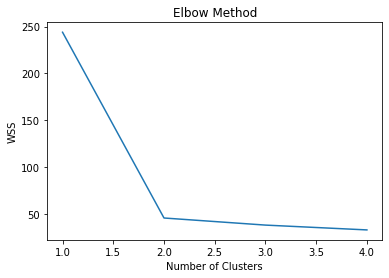

In [16]:
plt.plot(range(1,5), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [17]:
km=KMeans(n_clusters=2)
km.fit(new_wine)
labels=km.labels_

In [18]:
km.inertia_

45.52255176619497

In [19]:
#NEw labels adding to Data 
wine['Quality_k']=labels
wine.head()

,A,B,C,D,Quality,Quality_k
0,47,27,45,108,Quality A,0
1,174,133,134,166,Quality B,1
2,159,163,135,131,NaN,1
3,61,23,3,44,Quality A,0
4,59,60,9,68,Quality A,0


In [20]:
wine['Quality_k'].value_counts()

1    33
0    28
Name: Quality_k, dtype: int64

In [21]:
avg=wine.groupby(['Quality_k']).mean()
avg['count']=wine.Quality_k.value_counts().sort_index()
avg

,A,B,C,D,count
Quality_k,,,,,
0,58.75000,60.928571,49.750000,53.000000,28
1,169.30303,163.909091,168.666667,166.606061,33


In [22]:
wine['Quality'].value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

In [23]:
wine['Quality_k'].value_counts()

1    33
0    28
Name: Quality_k, dtype: int64

In [24]:
wine['Quality_k']=wine['Quality_k'].replace({0:'Quality A', 1:'Quality B'})

In [25]:
Quality_A = wine[wine['Quality_k']== 'Quality A']
Quality_A .head()

,A,B,C,D,Quality,Quality_k
0,47,27,45,108,Quality A,Quality A
3,61,23,3,44,Quality A,Quality A
4,59,60,9,68,Quality A,Quality A
6,34,28,78,22,Quality A,Quality A
10,76,94,107,37,Quality A,Quality A


In [26]:
Quality_B = wine[wine['Quality_k']== 'Quality B']
Quality_B .head()

,A,B,C,D,Quality,Quality_k
1,174,133,134,166,Quality B,Quality B
2,159,163,135,131,NaN,Quality B
5,153,140,154,199,NaN,Quality B
7,191,144,143,154,NaN,Quality B
8,160,181,194,178,Quality B,Quality B


In [27]:
wine.isna().sum()

A             0
B             0
C             0
D             0
Quality      18
Quality_k     0
dtype: int64

In [28]:
wi=wine.dropna()

In [29]:
pred=wi['Quality_k']
actual=wi['Quality']

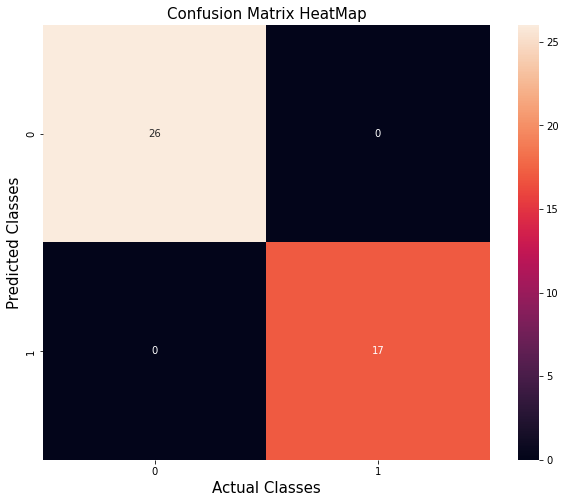

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm= confusion_matrix(actual, pred)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15);